0. Loading the dataset and Pre-processing


In [ ]:
# !pip install --upgrade --no-cache-dir gdown

In [ ]:
! gdown --id 1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
! gdown --id 1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
! gdown --id 1oiVQignVg1wvE1LXKFvOLHPl0P8GNSDp

# ! gdown --id 1pGkEyDelD7Lp7yhFML9Dt1oo-91Mqf9H
# ! gdown --id 1DYVzeYjjTTeHtazHfKD9FTx57h-77bkC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1E8OTtNK_UNSAdmkg3OuB0k2FsKKF9QpY
To: /content/train.csv
100% 98.6M/98.6M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-pm6_kvT9CBrYER40uIkRiG0KMlHnH7L
To: /content/test.csv
100% 25.1M/25.1M [00:00<00:00, 256MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://dr

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#loading the train and test data from Kaggle

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submit_data = pd.read_csv("submit.csv")

In [ ]:
#preprocess train data

In [ ]:
# Checking null values
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Removing null values
train_data.dropna(inplace=True)
train_data.drop(train_data.loc[train_data['text']==" "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="  "].index, inplace=True)
train_data.drop(train_data.loc[train_data['text']=="\n"].index, inplace=True)

# Resetting index
train_data.reset_index(inplace=True)

In [ ]:
train_data= train_data.apply(lambda x: x.astype(str).str.lower())

In [ ]:
train_data = train_data.drop(columns=["id", "index"])

In [ ]:
train_data

,title,author,text,label
0,house dem aide: we didn’t even see comey’s let...,darrell lucus,house dem aide: we didn’t even see comey’s let...,1
1,"flynn: hillary clinton, big woman on campus - ...",daniel j. flynn,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired,consortiumnews.com,"why the truth might get you fired october 29, ...",1
3,15 civilians killed in single us airstrike hav...,jessica purkiss,videos 15 civilians killed in single us airstr...,1
4,iranian woman jailed for fictional unpublished...,howard portnoy,print \nan iranian woman has been sentenced to...,1
...,...,...,...,...
18206,rapper t.i.: trump a ’poster child for white s...,jerome hudson,rapper t. i. unloaded on black celebrities who...,0
18207,"n.f.l. playoffs: schedule, matchups and odds -...",benjamin hoffman,when the green bay packers lost to the washing...,0
18208,macy’s is said to receive takeover approach by...,michael j. de la merced and rachel abrams,the macy’s of today grew from the union of sev...,0
18209,"nato, russia to hold parallel exercises in bal...",alex ansary,"nato, russia to hold parallel exercises in bal...",1


In [ ]:
# removing stopwords from training data text

In [ ]:
import nltk

import re
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words_set = set(stopwords.words('english'))

for i in range(len(train_data)):
    review = re.sub('[^a-zA-Z0-9]',' ',train_data['text'][i])
    review = review.split()
    review = [word for word in review if not word in stop_words_set]
    statements = ' '.join(review)
    train_data['text'][i] = statements



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = train_data

1. EDA: Plotting the Wordclouds for real and fake news text (in training data)

(-0.5, 399.5, 199.5, -0.5)

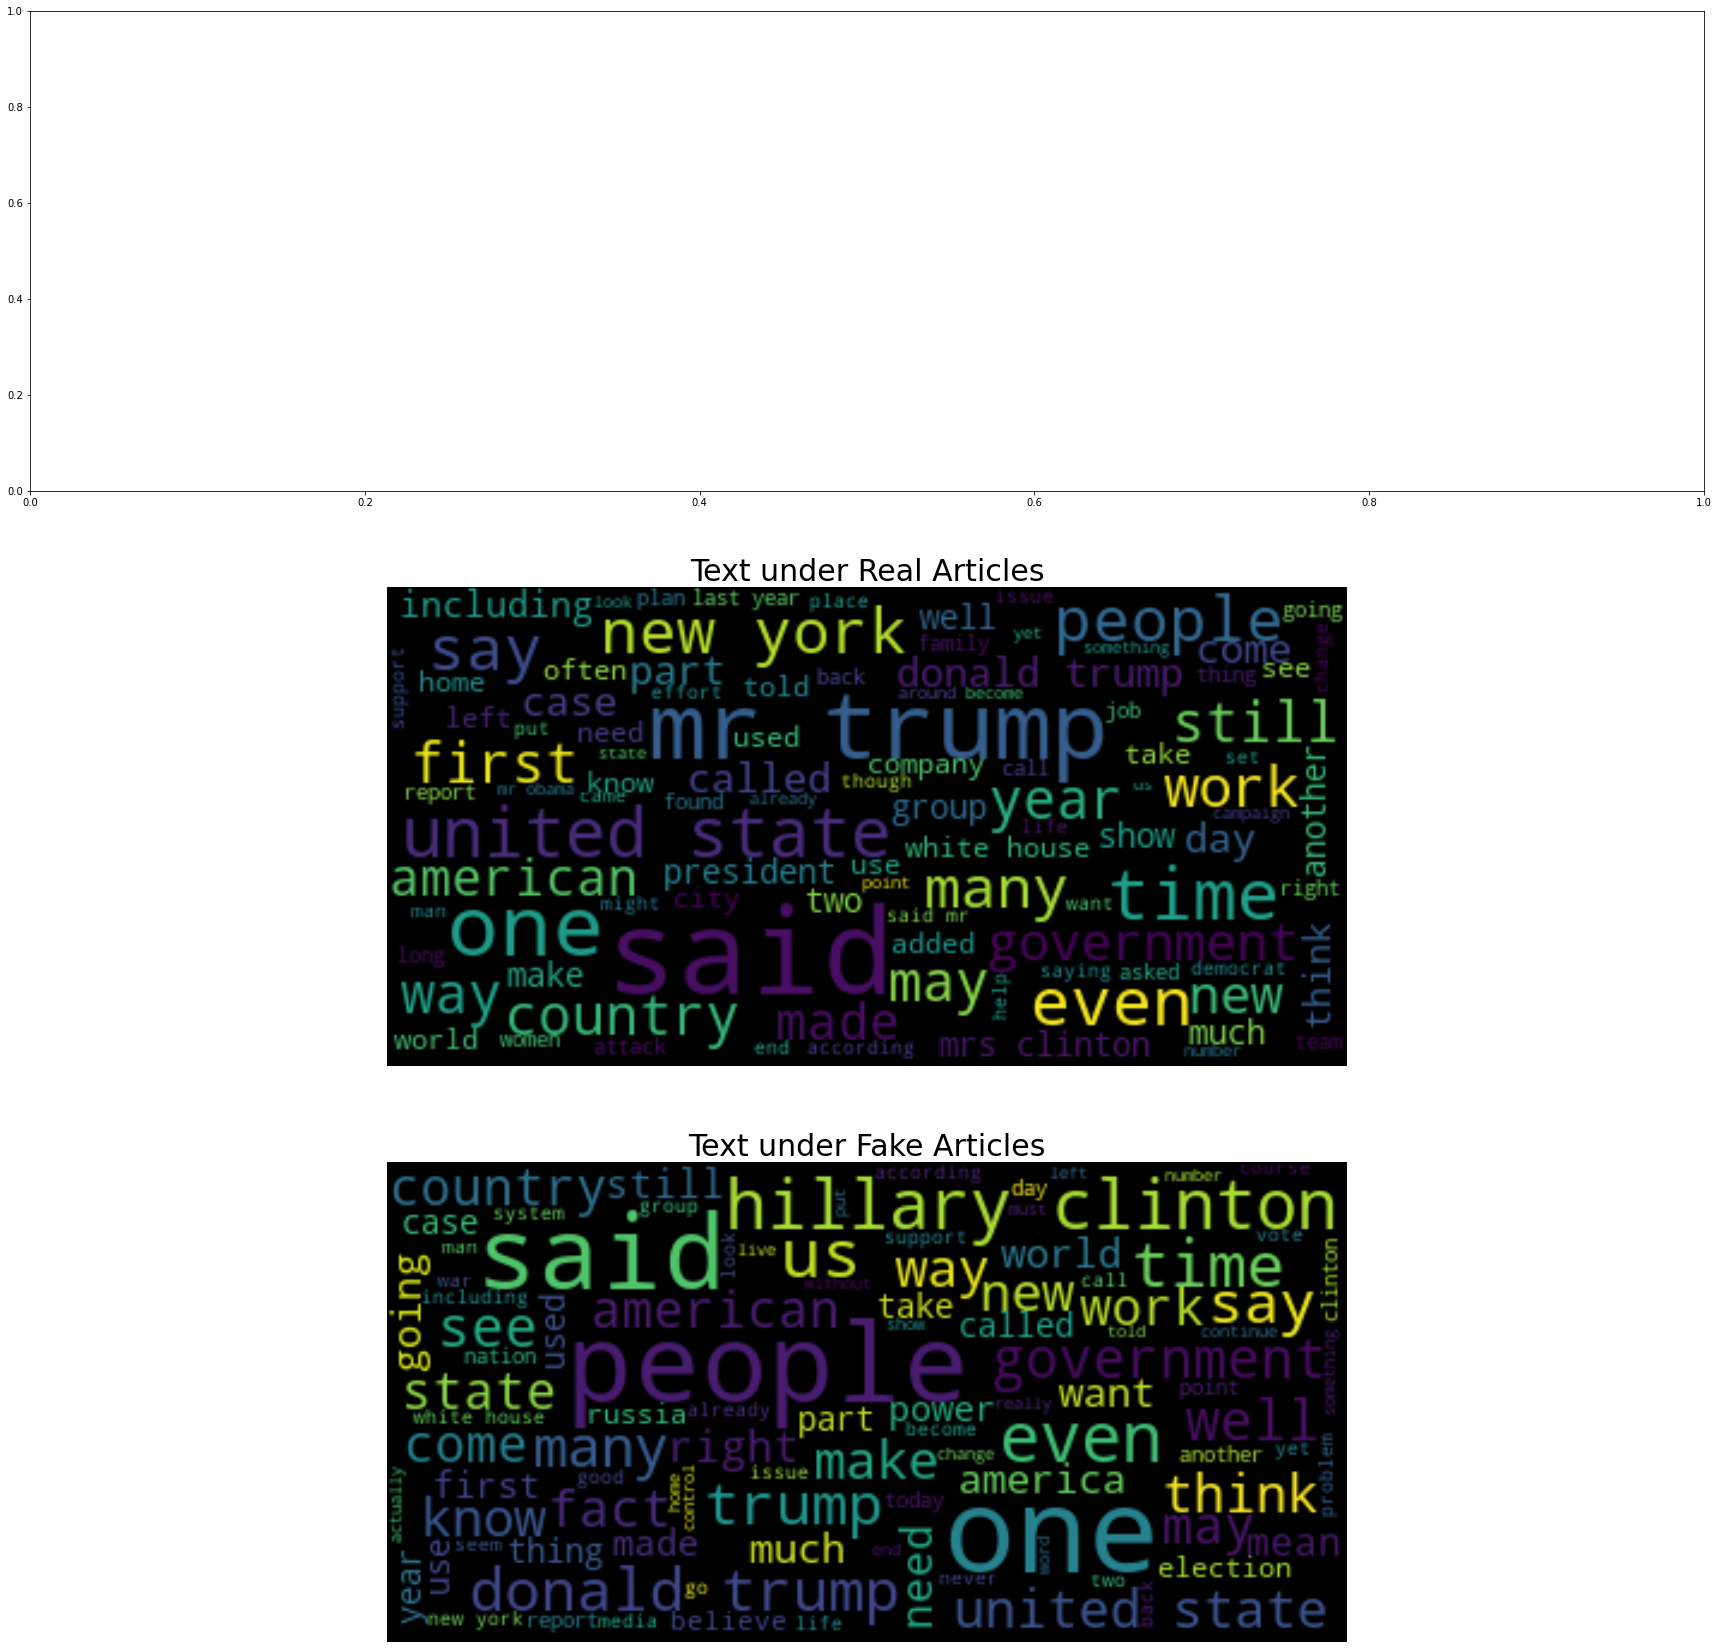

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

df_real = df[df['label'].astype('int')==0]

df_fake = df[df['label'].astype('int')==1]

text_real = " ".join(review for review in df_real.text)

text_fake = " ".join(review for review in df_fake.text)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100).generate(str(text_real))
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100).generate(str(text_fake))

# Display the generated image:
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Text under Real Articles',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Text under Fake Articles',fontsize=30)
ax[2].axis('off')